In [2]:
import numpy as np
import sinter
import multiprocessing
from ldpc.sinter_decoders import SinterBpOsdDecoder
from matplotlib import pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "CMU Serif",
    "figure.dpi" :300

})

from circuit import *

As the code $[[13, 1, 2]]$ code is small we quickly define its embeddings corresponding to the different crossing configurations below:

In [3]:
rep_3_checks = [(1, 0), (1, 2),
                (3, 2), (3, 4)]

rep_3_mod_checks = [(1, 0), (1, 2), (1, 4),
             (3, 2), (3, 4)]

log_obs = {'z' : [2], 'x' : [[(0, 2), (0, 4)]]}


embedding_B1 = [r'$B_1$',
                       [[(0, 1), (0, 4), 2],
                        [(1, 4), (1, 1), 2],
                        [(2, 1), (2, 4), 2],
                        [(3, 4), (3, 1), 2],
                        [(1, 2), (0, 2), 1],
                        [(0, 3), (1, 3), 1],
                        [(1, 2), (2, 2), 1],
                        [(2, 3), (1, 3), 1], 
                        [(3, 2), (2, 2), 1],
                        [(2, 3), (3, 3), 1],
                        [(3, 2), (4, 2), 1],
                        [(4, 3), (3, 3), 1], 
                        ]]

embedding_B2 = [r'$B_2$',
                     [
                     [(1, 4), (1, 1), 4],
                     [(2, 1), (2, 4), 1],
                     [(3, 4), (3, 1), 3],
                     [(0, 1), (0, 0), 1],
                     [(1, 0), (0, 0), 1],
                     [(2, 1), (2, 0), 1],
                     [(3, 0), (2, 0), 3],
                     [(3, 0), (4, 0), 1],
                     [(4, 1), (4, 0), 1],
                     ]]

embedding_B3 = [r'$B_3$',
                       [
                        [(1, 4), (1, 1), 1],
                        [(2, 1), (2, 4), 1],
                        [(3, 4), (3, 1), 1],
                        [(1, 0), (2, 0), 1],
                        [(3, 0), (2, 0), 1],
                        [(4, 1), (4, 0), 1],
                        ]]

Next we show the circuits corresponding to the three embeddings of the $[[13, 1, 2]]$ code, that we consider in our report. Feel free to change the variables. As the outputed .svg is rather small, we recommend saving it to have a better view. (Setting the errors to 0 also leads to better clarity.)

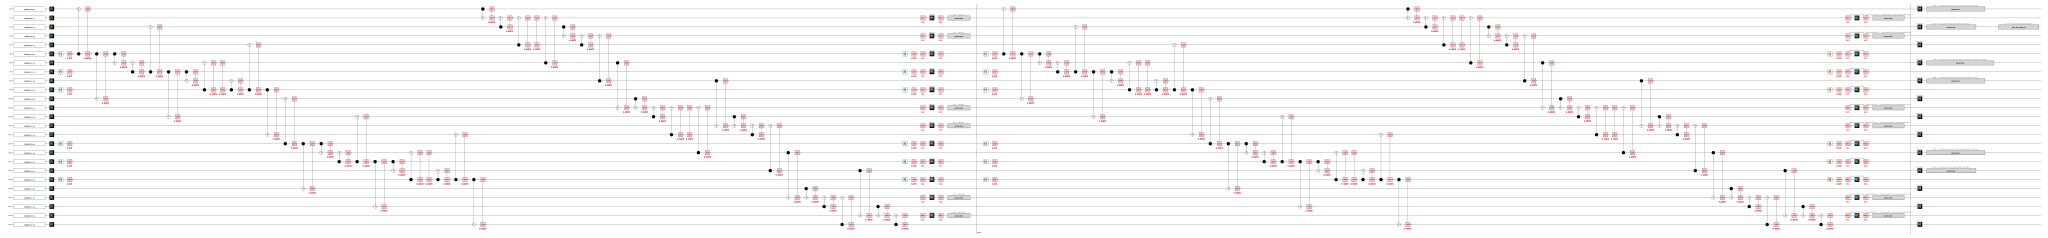

In [7]:
non_crossed_gate_error = 0.1
crossed_gate_error = 0.5
experiment = 'z_memory'

B1 = circuit_builder(
                     shape = (5, 5),
                     row_checks = rep_3_mod_checks,
                     col_checks = rep_3_checks,
                     crossings = embedding_B1[1],
                     experiment = experiment,
                     observable = log_obs['x' if experiment == 'x_memory' else 'z'],
                     rounds = 3,
                     after_clifford_depolarization = non_crossed_gate_error,
                     after_crossing_depolarization = crossed_gate_error,
                     after_reset_flip_probability = non_crossed_gate_error,
                     before_measure_flip_probability = non_crossed_gate_error,
                    )

B1.diagram('timeline-svg')

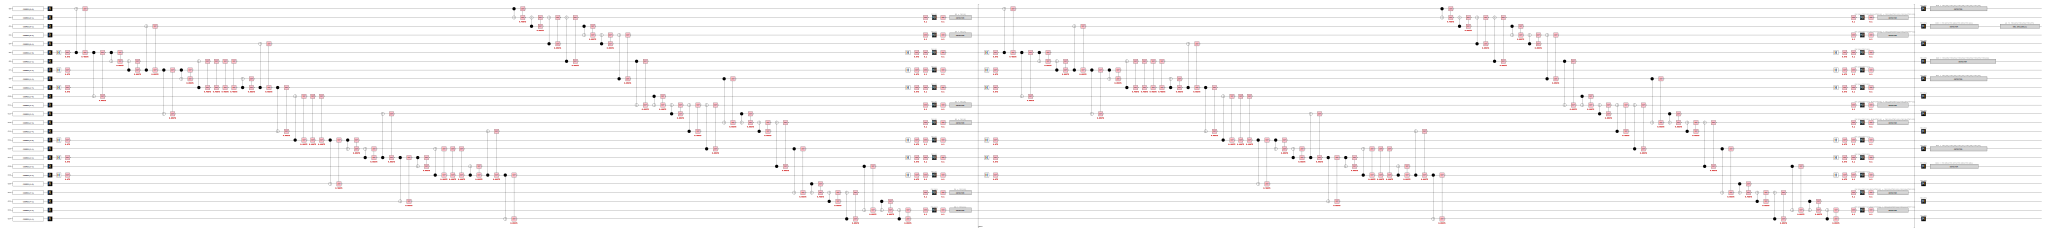

In [8]:
B2 = circuit_builder(
                     shape = (5, 5),
                     row_checks = rep_3_mod_checks,
                     col_checks = rep_3_checks,
                     crossings = embedding_B2[1],
                     experiment = experiment,
                     observable = log_obs['x' if experiment == 'x_memory' else 'z'],
                     rounds = 3,
                     after_clifford_depolarization = non_crossed_gate_error,
                     after_crossing_depolarization = crossed_gate_error,
                     after_reset_flip_probability = non_crossed_gate_error,
                     before_measure_flip_probability = non_crossed_gate_error,
                    )

B2.diagram('timeline-svg')

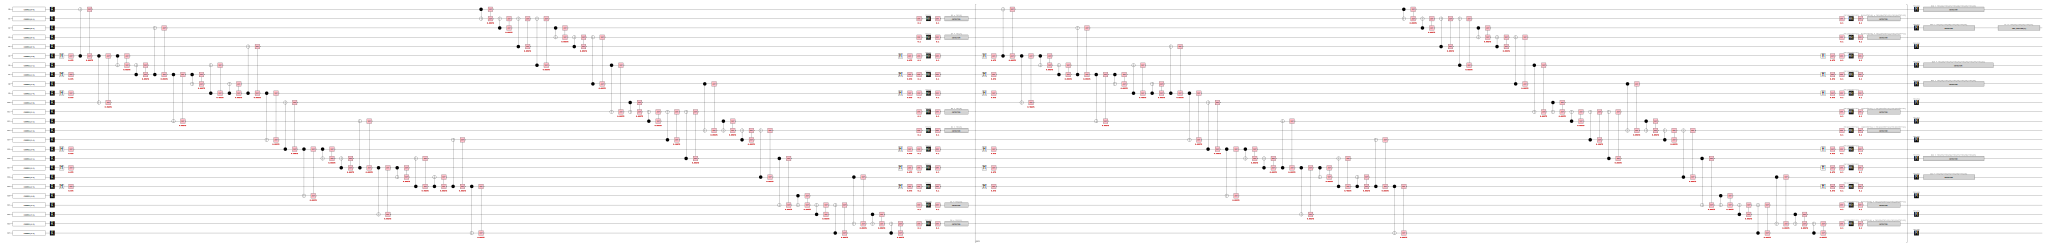

In [9]:
B3 = circuit_builder(
                     shape = (5, 5),
                     row_checks = rep_3_mod_checks,
                     col_checks = rep_3_checks,
                     crossings = embedding_B3[1],
                     experiment = experiment,
                     observable = log_obs['x' if experiment == 'x_memory' else 'z'],
                     rounds = 3,
                     after_clifford_depolarization = non_crossed_gate_error,
                     after_crossing_depolarization = crossed_gate_error,
                     after_reset_flip_probability = non_crossed_gate_error,
                     before_measure_flip_probability = non_crossed_gate_error,
                    )

B3.diagram('timeline-svg')

Next we define some utility functions for sample generation and plotting, followed by the experiments.

In [4]:
mycolors = plt.cm.Dark2(np.linspace(0,0.7,6))

In [5]:
def costum_colors(stat):

    if stat == r'$B_1$':
        return {'color' : mycolors[0]}
    if stat == r'$B_2$':
        return {'color' : mycolors[5]}
    if stat == r'$B_3$':
        return {'color' : mycolors[2]}
    if stat == r'$B_4$':
        return {'color' : mycolors[1]}



In [8]:

def generate_samples(crossing_ids, ind_obs, alpha_range, p_range, experiment):
    crossings = []
    for c_id in crossing_ids:
        for cr in [
                    [embedding_B1, log_obs],
                    [embedding_B2, log_obs],
                    [embedding_B3, log_obs],
                ]:
            
            if c_id == cr[0][0]:
                crossings.append(cr)

    for alpha in alpha_range: 
        for p in p_range:
            for crossing in crossings:
                for observable in [crossing[1]['x' if experiment == 'x_memory' else 'z']]:
                    yield sinter.Task(
                            circuit = circuit_builder(
                                shape = (5, 5),
                                row_checks = rep_3_mod_checks,
                                col_checks = rep_3_checks,
                                crossings = 0 if alpha == 0 else crossing[0][1],
                                observable = 
                                    observable if ind_obs == False else [observable[ind_obs]],
                                experiment = experiment,
                                rounds = 3,
                                after_clifford_depolarization = p,
                                after_crossing_depolarization = alpha * p,
                                after_reset_flip_probability = p,
                                before_measure_flip_probability = p,
                            ),
                            json_metadata = {
                                'p' : p,
                                'alpha' : alpha,
                                'crossing' : crossing[0][0],
                            }
                        )

def run_experiments(crossing_ids, ind_obs, alpha_range, p_range, experiment):
    
    samples = sinter.collect(
        num_workers = multiprocessing.cpu_count() - 1,
        max_shots = 500000,
        max_errors = 500,
        tasks = generate_samples(
            crossing_ids = crossing_ids,
            ind_obs = ind_obs,
            alpha_range = alpha_range,
            p_range = p_range,
            experiment = experiment,
        ),
        decoders = ['bposd'],
        custom_decoders={'bposd': SinterBpOsdDecoder(
            max_iter=13,
            bp_method="ms",
            ms_scaling_factor=0.5,
            schedule="parallel",
            osd_method="osd0")},
        print_progress = False
    )

    return samples

# Experiment 1: same number of crossings different embeddings:

In [9]:
A12_z_memory_samples = run_experiments(
    crossing_ids = [r'$B_1$', r'$B_2$'],
    alpha_range = [10],
    ind_obs = False,
    p_range = np.logspace(-4, -1.1, 10, base = 10),
    experiment = 'z_memory'
)

A12_x_memory_samples = run_experiments(
    crossing_ids = [r'$B_1$', r'$B_2$'],
    alpha_range = [10],
    ind_obs = False,
    p_range = np.logspace(-4, -1.1, 10, base = 10),
    experiment = 'x_memory'
)

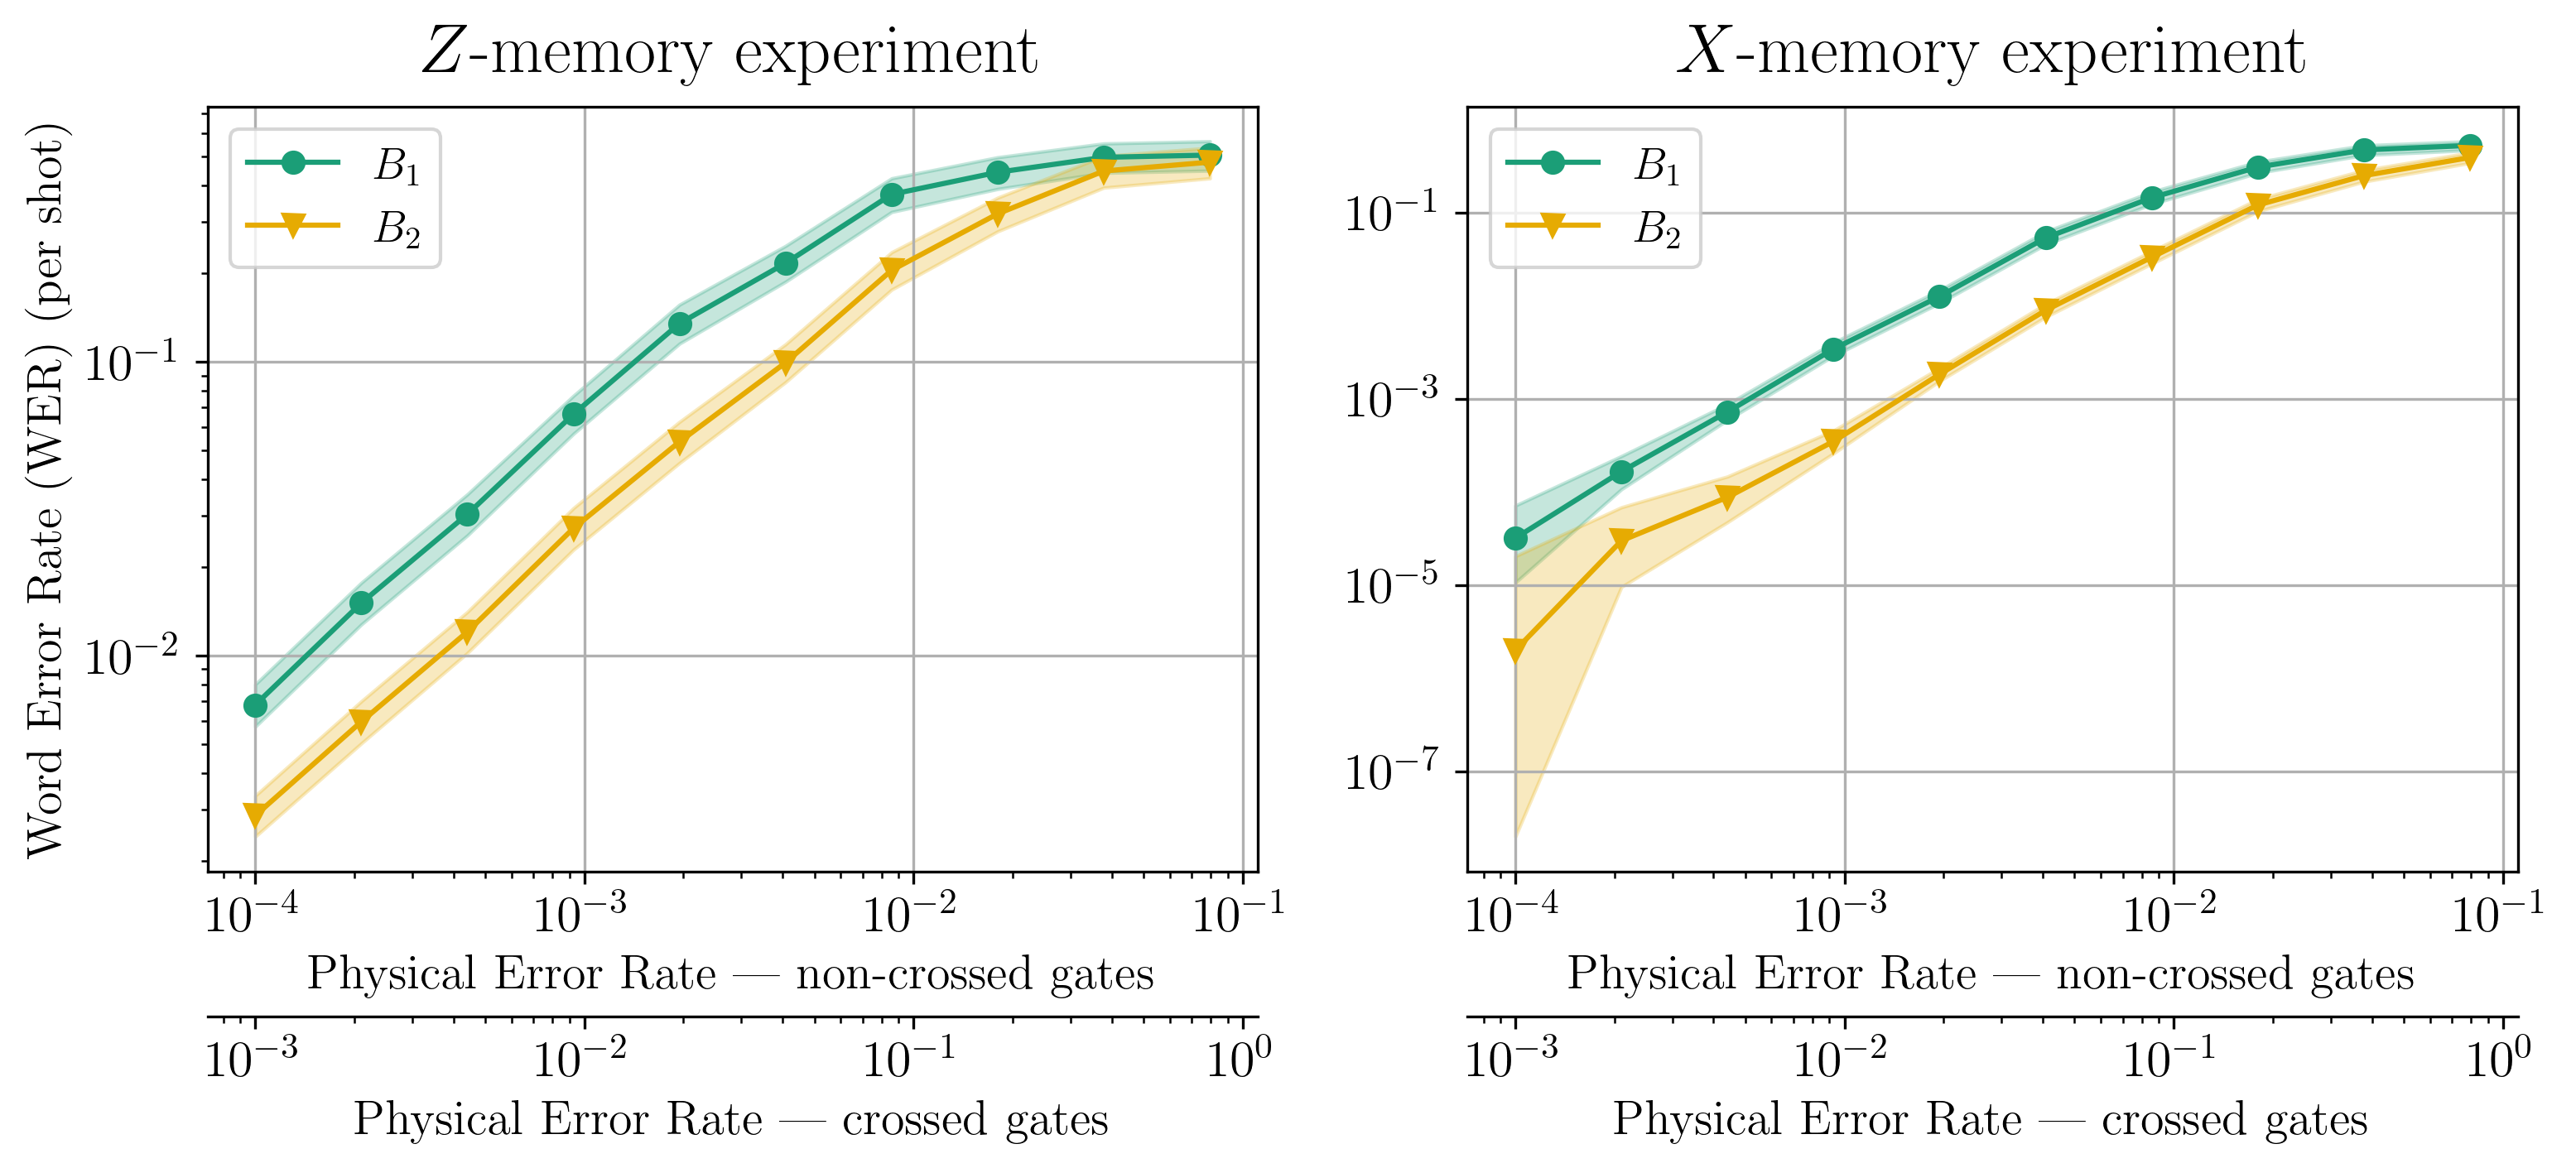

In [11]:
all_samples = [A12_z_memory_samples, A12_x_memory_samples]
experiments = [r'$Z$-memory experiment', r'$X$-memory experiment']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
axes = [ax1, ax2]

def forward(x):
    return x*10

for i in range(len(all_samples)):
    sinter.plot_error_rate(
        ax = axes[i], stats = all_samples[i], 
        group_func = lambda stat: f"{stat.json_metadata['crossing']}",
        x_func=lambda stat: stat.json_metadata['p'],
        plot_args_func = lambda curve_id, stat: costum_colors(stat),
    )

    axes[i].loglog()
    axes[i].grid()
    axes[i].set_title(experiments[i], fontsize = 20, pad = 10)
    axes[i].set_xlabel('Physical Error Rate | non-crossed gates', fontsize = 14 )
    axes[i].legend(fontsize = 13)
    axes[i].tick_params(axis='both', which='major', labelsize=15)
    
    secax = axes[i].secondary_xaxis(-0.19, functions = (forward, forward))
    secax.set_xlabel('Physical Error Rate | crossed gates',  fontsize = 14)
    secax.tick_params(labelsize=15)

axes[0].set_ylabel('Word Error Rate (WER) (per shot)',  fontsize = 14)
plt.show()



# Experiment 2: different number of crossings, different embeddings

In [12]:
A32_z_memory_samples = run_experiments(
    crossing_ids = [r'$B_3$', r'$B_2$'],
    alpha_range = [10],
    ind_obs = False,
    p_range = np.logspace(-4, -1.1, 10, base = 10),
    experiment = 'z_memory'
)

A32_x_memory_samples = run_experiments(
    crossing_ids = [r'$B_3$', r'$B_2$'],
    alpha_range = [10],
    ind_obs = False,
    p_range = np.logspace(-4, -1.1, 10, base = 10),
    experiment = 'x_memory'
)

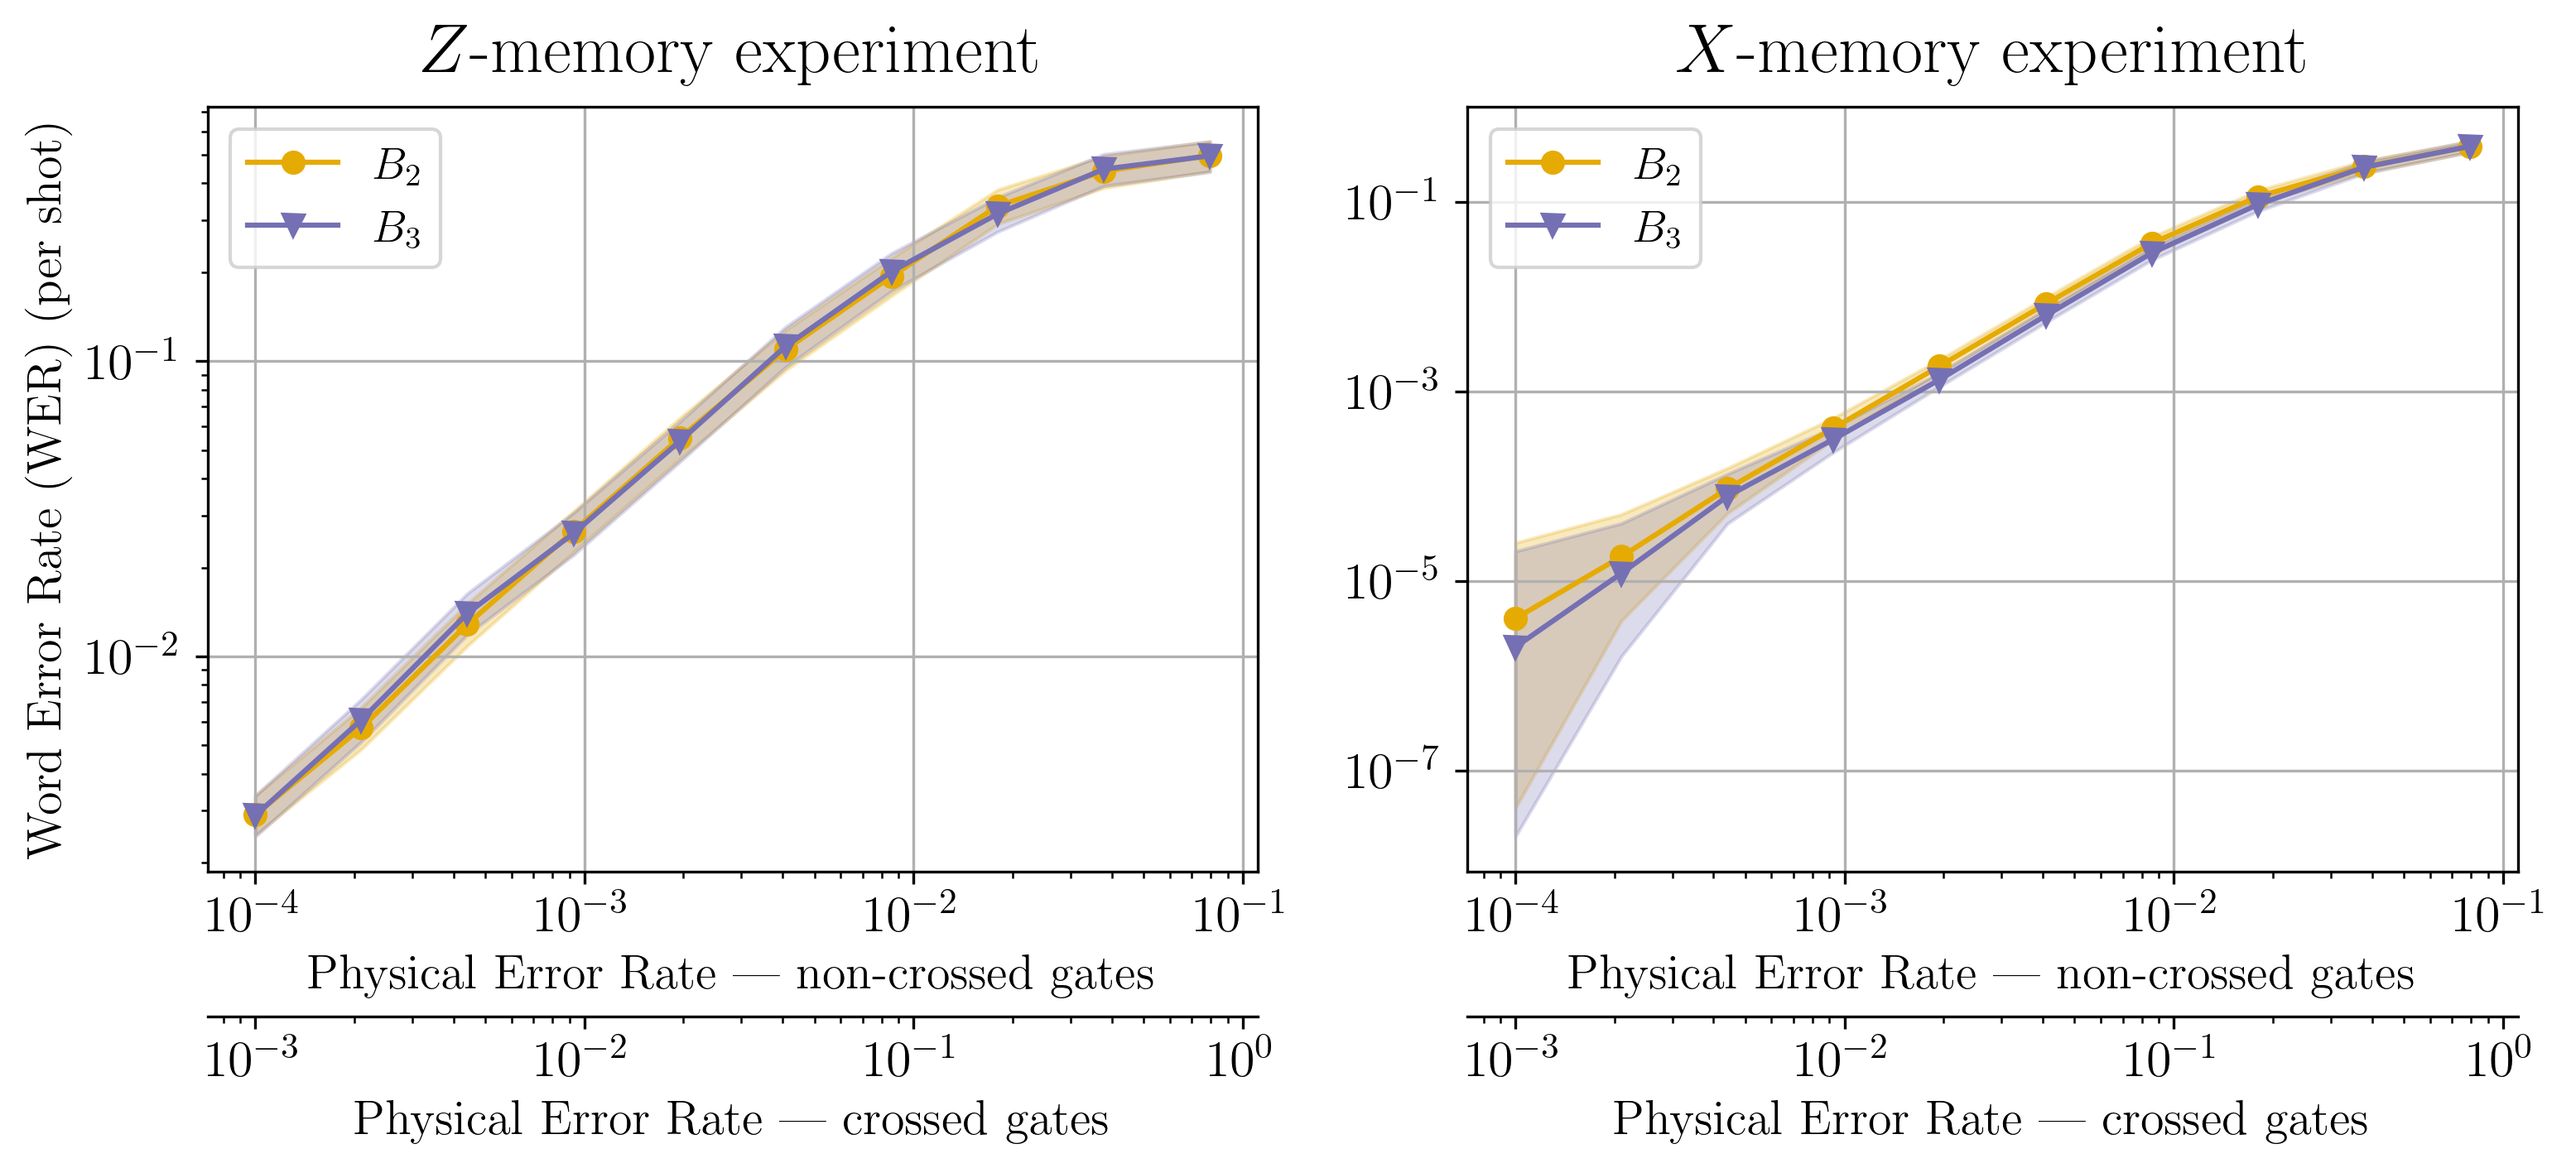

In [13]:
all_samples = [A32_z_memory_samples, A32_x_memory_samples]
experiments = [r'$Z$-memory experiment', r'$X$-memory experiment']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
axes = [ax1, ax2]

def forward(x):
    return x*10

for i in range(len(all_samples)):
    sinter.plot_error_rate(
        ax = axes[i], stats = all_samples[i], 
        group_func = lambda stat: f"{stat.json_metadata['crossing']}",
        x_func=lambda stat: stat.json_metadata['p'],
        plot_args_func = lambda curve_id, stat: costum_colors(stat),
    )

    axes[i].loglog()
    axes[i].grid()
    axes[i].set_title(experiments[i], fontsize = 20, pad = 10)
    axes[i].set_xlabel('Physical Error Rate | non-crossed gates', fontsize = 14 )
    axes[i].legend(fontsize = 13)
    axes[i].tick_params(axis='both', which='major', labelsize=15)
    
    secax = axes[i].secondary_xaxis(-0.19, functions = (forward, forward))
    secax.set_xlabel('Physical Error Rate | crossed gates',  fontsize = 14)
    secax.tick_params(labelsize=15)

axes[0].set_ylabel('Word Error Rate (WER) (per shot)',  fontsize = 14)
plt.show()

